In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [71]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [72]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


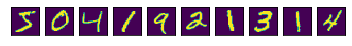

In [73]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()

In [74]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [95]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation='softmax')
        ]),
    if model_number == 2:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation='relu'),
            keras.layers.Conv2D(64, (3, 3), activation='relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation='softmax')
        ]),
    if model_number == 3:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation='relu'),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation='relu'),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(128, (3, 3), activation='relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation='softmax')
        ]),

    return model

In [81]:
model = select_model(1)

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                46090     
Total params: 55,658
Trainable params: 55,658
Non-trainable params: 0
_________________________________________________________________


## Training Step

In [83]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [84]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2493 - accuracy: 0.9497
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0661 - accuracy: 0.9800
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0494 - accuracy: 0.9847
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0425 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0345 - accuracy: 0.9893


## Test Step

In [85]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest loss : ", test_loss)
print("Test accuracy : ", accuracy)

313/313 - 2s - loss: 0.0702 - accuracy: 0.9807

Test loss :  0.07020625472068787
Test accuracy :  0.9807000160217285


In [86]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [87]:
print("Prediction : ", pred.shape)
print("Test labels : ", test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


## Function for plot images, probability

In [88]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                        100*np.max(predictions_array),
                                        Number[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [89]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

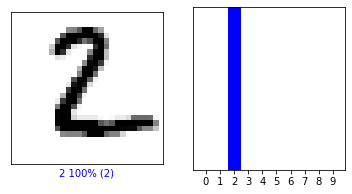

In [90]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

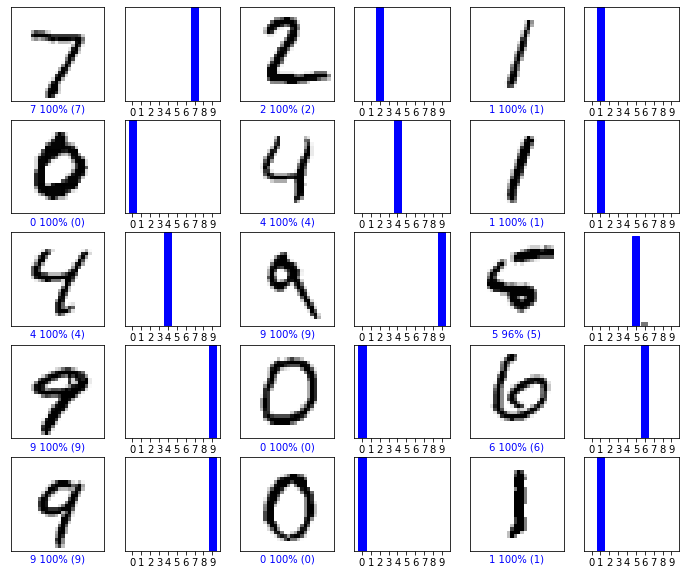

In [91]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [92]:
def error_mnist(prediction_array, true_label):
    error_index =[]
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

def plot_error(index, prediction_array, true_label):
    num_cols = 4
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    
    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [93]:
index = error_mnist(pred, test_labels)
index_slice = index[:12]
print(index[:12])

[18, 211, 247, 266, 321, 445, 449, 450, 542, 582, 583, 659]


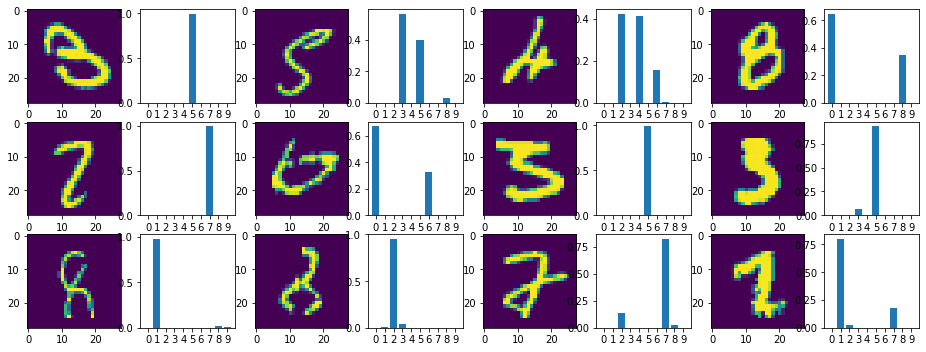

In [94]:
plot_error(index_slice, pred, test_labels)